In [75]:
#DECLARAÇÃO DE BIBLIOTECAS

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

In [88]:
#GERAÇÃO DE DADOS

N = 1000

x1 = np.random.randint(0,2,N)
x2 = np.random.randint(0,2,N)

Y = (abs(1-x1)*x2) | (x1*abs(1-x2))

Y1 = (~x1)&x2
Y2 = x1&(~x2)

x1 = x1 + 0.05*np.random.randn(N,)

x2 = x2 + 0.05*np.random.randn(N,)

x0 = np.ones ((N,))

#dados perceptron 1
X1 = np.c_[x0,(abs(1-x1)),x2]


#dados perceptron 2
X2 = np.c_[x0,x1,(abs(1-x2))]


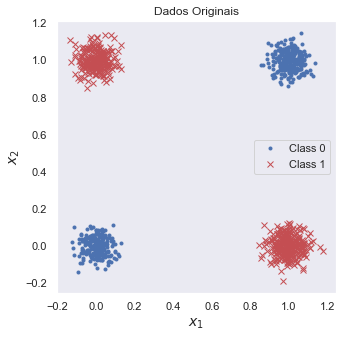

In [89]:
#PLOT DOS DADOS

idx0 = np.argwhere(Y == 0)
idx1 = np.argwhere(Y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Dados Originais')
plt.legend()
plt.grid()
plt.show()

In [90]:
#PERCEPTRON 1

per_1 = Perceptron(random_state=42)
per_1.fit(X1, Y1)

y_pred_1 = per_1.predict(X1)

error_1 = mean_squared_error(y_pred_1, Y1)
print('MSE: ', error_1)

MSE:  0.0


In [91]:
#PERCEPTRON 2

per_2 = Perceptron(random_state=42)
per_2.fit(X2, Y2)

y_pred_2 = per_2.predict(X2)
        
error_2 = mean_squared_error(y_pred_2, Y2)
print('MSE: ', error_2)

MSE:  0.0


In [92]:
#PERCEPTRON 3

#dados perceptron 3
X = np.c_[x0,y_pred_1,y_pred_2]

per_3 = Perceptron(random_state=42)
per_3.fit(X, Y)

y_pred_3 = per_3.predict(X)
error_3 = mean_squared_error(y_pred_3, Y)
print('MSE: ', error_3)

MSE:  0.0


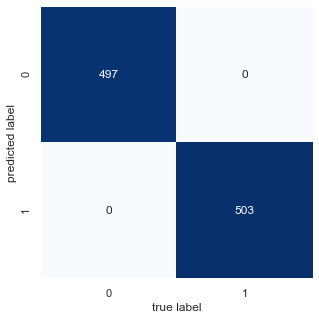

In [93]:
#PLOT MATRIZ DE CONFUSAO

fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(Y, y_pred_3)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

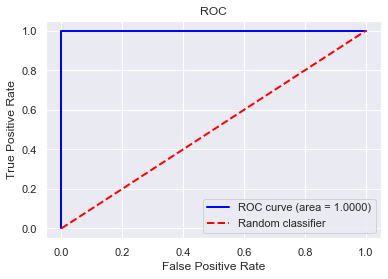

In [94]:
#PLOT CURVA ROC

# Calculating ROC curve and ROC AUC.
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y, y_pred_3)
roc_auc = auc(false_positive_rate, true_positive_rate)
# Plotting ROC curve.
lw = 2
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=lw, label='ROC curve (area = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

ÁREA SOB A CURVA ROC = 1

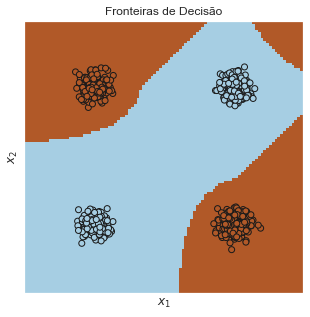

In [96]:
#PLOT FRONTEIRAS DE DECISAO

x_min, x_max = X[:, 1].min() - .5, X[:, 2].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 2].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = per_3.predict(np.c_[np.ones((len(xx.ravel()), 1)), (abs(1 - xx.ravel())*yy.ravel()), (xx.ravel()*abs(1 - yy.ravel()))])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x1, x2, c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Fronteiras de Decisão')

plt.show()